train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.77655, 0.7832
train acc, test acc | 0.8754333333333333, 0.8803
train acc, test acc | 0.8972, 0.9006
train acc, test acc | 0.9065833333333333, 0.9095
train acc, test acc | 0.9131333333333334, 0.9146
train acc, test acc | 0.91815, 0.9193
train acc, test acc | 0.92345, 0.9253
train acc, test acc | 0.9260833333333334, 0.9282


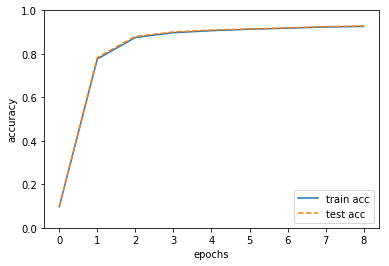

In [3]:
# coding: utf-8
# ミニバッチ処理での学習とテストデータでの評価
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from mine_two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# ハイパーパラメータの設定
iters_num = 5000 # 繰り返しの回数を任意設定
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

# 1エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)

# 2層のニューラルネットワークを構築
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size) # 無作為に100データを抽出
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配の計算
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) #高速版

    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 学習過程の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [4]:
print(iter_per_epoch)

600.0
